# PART : 1

### Importing Dependencies


In [ ]:
import numpy as np
import math
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D, LeakyReLU, Input
from keras.layers import Conv2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.callbacks import ModelCheckpoint

### Train Test Split

In [ ]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print("\nData after 70:30 split")
print("----------------------\n")
print("X_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)


Data after 70:30 split
----------------------

X_train shape : (49000, 28, 28, 1)
y_train shape : (49000,)
X_test shape : (21000, 28, 28, 1)
y_test shape : (21000,)


### Normalize Data

In [ ]:
def normalize_data(x_train, x_test):
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test
    
x_train, x_test = normalize_data(x_train, x_test)

### Converting Labels to Categorical format

In [ ]:
def process_labels(y_train, y_test):
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return y_train, y_test

y_train, y_test = process_labels(y_train, y_test)    

# Running for various Optimizers

### 1. Training Neural Net with ADAM

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_adam = model.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 27s 34ms/step - loss: 0.8574 - accuracy: 0.7223 - val_loss: 0.2182 - val_accuracy: 0.9358
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2696 - accuracy: 0.9188 - val_loss: 0.1561 - val_accuracy: 0.9534
Epoch 3/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2079 - accuracy: 0.9358 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 4/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1842 - accuracy: 0.9450 - val_loss: 0.1279 - val_accuracy: 0.9595
Epoch 5/10
765/765 [==============================] - 26s 34ms/step - loss: 0.1682 - accuracy: 0.9480 - val_loss: 0.1128 - val_accuracy: 0.9669
Epoch 6/10
765/765 [==============================] - 26s 34ms/step - loss: 0.1467 - accuracy: 0.9553 - val_loss: 0.1009 - val_accuracy: 0.9691
Epoch 7/10
765/765 [==============================] - 26s 34ms/step - loss: 0.1479 - accuracy: 0.9550 - val_loss: 0.1028 - val_accuracy:

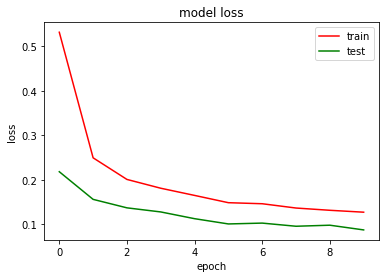

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_adam.history['loss'], color='red')
ax.plot(hist_adam.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 2. Training Neural Net with RMSProp



In [ ]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model2.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_rms = model2.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 28s 36ms/step - loss: 0.8384 - accuracy: 0.7303 - val_loss: 0.2215 - val_accuracy: 0.9317
Epoch 2/10
765/765 [==============================] - 27s 36ms/step - loss: 0.2684 - accuracy: 0.9204 - val_loss: 0.1757 - val_accuracy: 0.9473
Epoch 3/10
765/765 [==============================] - 27s 36ms/step - loss: 0.2101 - accuracy: 0.9369 - val_loss: 0.1387 - val_accuracy: 0.9586
Epoch 4/10
765/765 [==============================] - 28s 36ms/step - loss: 0.1857 - accuracy: 0.9467 - val_loss: 0.1303 - val_accuracy: 0.9605
Epoch 5/10
765/765 [==============================] - 27s 35ms/step - loss: 0.1820 - accuracy: 0.9487 - val_loss: 0.1279 - val_accuracy: 0.9649
Epoch 6/10
765/765 [==============================] - 27s 35ms/step - loss: 0.1747 - accuracy: 0.9518 - val_loss: 0.1205 - val_accuracy: 0.9647
Epoch 7/10
765/765 [==============================] - 27s 36ms/step - loss: 0.1648 - accuracy: 0.9550 - val_loss: 0.1200 - val_accuracy:

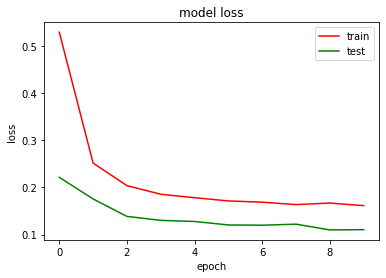

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_rms.history['loss'], color='red')
ax.plot(hist_rms.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 3. Training Neural Net with SGD

In [ ]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10))
model3.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model3.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_sgd = model3.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 25s 32ms/step - loss: 1.9104 - accuracy: 0.3517 - val_loss: 0.9784 - val_accuracy: 0.7242
Epoch 2/10
765/765 [==============================] - 24s 32ms/step - loss: 1.0479 - accuracy: 0.6667 - val_loss: 0.7345 - val_accuracy: 0.7908
Epoch 3/10
765/765 [==============================] - 24s 32ms/step - loss: 0.8140 - accuracy: 0.7512 - val_loss: 0.5966 - val_accuracy: 0.8336
Epoch 4/10
765/765 [==============================] - 24s 32ms/step - loss: 0.6906 - accuracy: 0.7895 - val_loss: 0.5062 - val_accuracy: 0.8562
Epoch 5/10
765/765 [==============================] - 24s 32ms/step - loss: 0.5974 - accuracy: 0.8228 - val_loss: 0.4459 - val_accuracy: 0.8743
Epoch 6/10
765/765 [==============================] - 24s 32ms/step - loss: 0.5328 - accuracy: 0.8417 - val_loss: 0.3938 - val_accuracy: 0.8892
Epoch 7/10
765/765 [==============================] - 24s 32ms/step - loss: 0.4802 - accuracy: 0.8573 - val_loss: 0.3499 - val_accuracy:

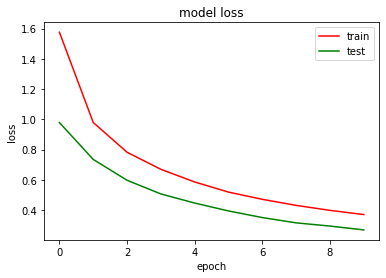

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_sgd.history['loss'], color='red')
ax.plot(hist_sgd.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 4. Training Neural Net with SGD (Momentum)




In [ ]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10))
model4.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model4.compile(optimizer = SGD(lr=0.01, momentum=0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_sgdm = model4.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 26s 33ms/step - loss: 1.1714 - accuracy: 0.6118 - val_loss: 0.3258 - val_accuracy: 0.9063
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.3747 - accuracy: 0.8869 - val_loss: 0.2172 - val_accuracy: 0.9354
Epoch 3/10
765/765 [==============================] - 25s 32ms/step - loss: 0.2867 - accuracy: 0.9141 - val_loss: 0.1731 - val_accuracy: 0.9477
Epoch 4/10
765/765 [==============================] - 24s 32ms/step - loss: 0.2340 - accuracy: 0.9303 - val_loss: 0.1516 - val_accuracy: 0.9536
Epoch 5/10
765/765 [==============================] - 25s 32ms/step - loss: 0.2022 - accuracy: 0.9384 - val_loss: 0.1375 - val_accuracy: 0.9581
Epoch 6/10
765/765 [==============================] - 25s 32ms/step - loss: 0.1877 - accuracy: 0.9444 - val_loss: 0.1238 - val_accuracy: 0.9616
Epoch 7/10
765/765 [==============================] - 25s 32ms/step - loss: 0.1736 - accuracy: 0.9474 - val_loss: 0.1257 - val_accuracy:

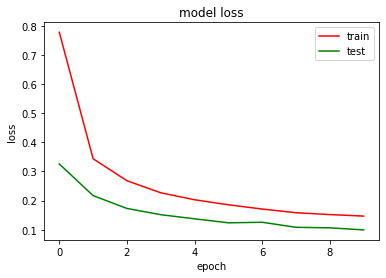

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_sgdm.history['loss'], color='red')
ax.plot(hist_sgdm.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('model_adam.h5')
model2.save('model_rms.h5')
model3.save('model_sgd.h5')
model4.save('model_sgdm.h5')

### Comparision between above optimizers

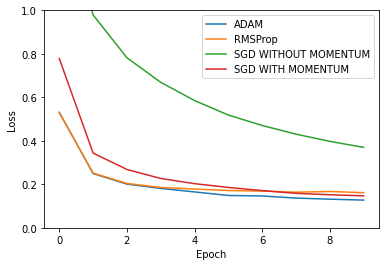

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])

plt.plot(hist_adam.history['loss'], label='ADAM')
plt.plot(hist_rms.history['loss'], label='RMSProp')
plt.plot(hist_sgd.history['loss'], label='SGD WITHOUT MOMENTUM') 
plt.plot(hist_sgdm.history['loss'], label='SGD WITH MOMENTUM')

plt.legend()

## Running for various Weight Initializers

### Optimizer used : ADAM


### 1. Training Neural Net with Xavier Initialization


In [ ]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(512, kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(Dropout(0.3))
model5.add(Dense(64, kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, kernel_initializer='glorot_uniform'))
model5.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model5.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_xavier = model5.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 27s 34ms/step - loss: 0.8850 - accuracy: 0.7127 - val_loss: 0.2084 - val_accuracy: 0.9364
Epoch 2/10
765/765 [==============================] - 26s 34ms/step - loss: 0.2691 - accuracy: 0.9182 - val_loss: 0.1647 - val_accuracy: 0.9509
Epoch 3/10
765/765 [==============================] - 26s 34ms/step - loss: 0.2147 - accuracy: 0.9349 - val_loss: 0.1386 - val_accuracy: 0.9573
Epoch 4/10
765/765 [==============================] - 26s 34ms/step - loss: 0.1798 - accuracy: 0.9424 - val_loss: 0.1233 - val_accuracy: 0.9627
Epoch 5/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1698 - accuracy: 0.9494 - val_loss: 0.1237 - val_accuracy: 0.9600
Epoch 6/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1518 - accuracy: 0.9519 - val_loss: 0.1106 - val_accuracy: 0.9652
Epoch 7/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1433 - accuracy: 0.9556 - val_loss: 0.1040 - val_accuracy:

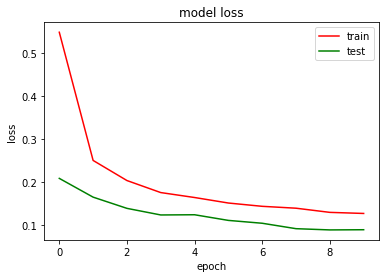

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_xavier.history['loss'], color='red')
ax.plot(hist_xavier.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 2. Training Neural net with Uniform Initialization

In [ ]:
model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(512, kernel_initializer='random_uniform'))
model6.add(Activation('relu'))
model6.add(Dropout(0.3))
model6.add(Dense(64, kernel_initializer='random_uniform'))
model6.add(Activation('relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10, kernel_initializer='random_uniform'))
model6.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model6.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_uniform = model6.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 26s 34ms/step - loss: 1.0005 - accuracy: 0.6793 - val_loss: 0.2510 - val_accuracy: 0.9244
Epoch 2/10
765/765 [==============================] - 26s 34ms/step - loss: 0.2801 - accuracy: 0.9148 - val_loss: 0.1672 - val_accuracy: 0.9492
Epoch 3/10
765/765 [==============================] - 26s 34ms/step - loss: 0.2184 - accuracy: 0.9342 - val_loss: 0.1423 - val_accuracy: 0.9570
Epoch 4/10
765/765 [==============================] - 26s 35ms/step - loss: 0.1802 - accuracy: 0.9453 - val_loss: 0.1234 - val_accuracy: 0.9627
Epoch 5/10
765/765 [==============================] - 26s 34ms/step - loss: 0.1605 - accuracy: 0.9517 - val_loss: 0.1187 - val_accuracy: 0.9638
Epoch 6/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1481 - accuracy: 0.9557 - val_loss: 0.1091 - val_accuracy: 0.9655
Epoch 7/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1390 - accuracy: 0.9570 - val_loss: 0.1063 - val_accuracy:

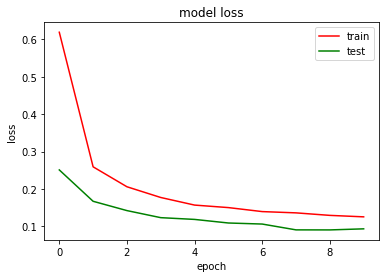

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_uniform.history['loss'], color='red')
ax.plot(hist_uniform.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 3. Training Neural Net with Normal Initialization

In [ ]:
model7 = Sequential()
model7.add(Flatten())
model7.add(Dense(512, kernel_initializer='random_normal'))
model7.add(Activation('relu'))
model7.add(Dropout(0.3))
model7.add(Dense(64, kernel_initializer='random_normal'))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))
model7.add(Dense(10, kernel_initializer='random_normal'))
model7.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model7.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_normal = model7.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 26s 34ms/step - loss: 0.9411 - accuracy: 0.7010 - val_loss: 0.2303 - val_accuracy: 0.9319
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2688 - accuracy: 0.9182 - val_loss: 0.1672 - val_accuracy: 0.9483
Epoch 3/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2131 - accuracy: 0.9334 - val_loss: 0.1418 - val_accuracy: 0.9568
Epoch 4/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1736 - accuracy: 0.9478 - val_loss: 0.1352 - val_accuracy: 0.9596
Epoch 5/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1611 - accuracy: 0.9501 - val_loss: 0.1157 - val_accuracy: 0.9634
Epoch 6/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1458 - accuracy: 0.9553 - val_loss: 0.1042 - val_accuracy: 0.9676
Epoch 7/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1340 - accuracy: 0.9599 - val_loss: 0.1026 - val_accuracy:

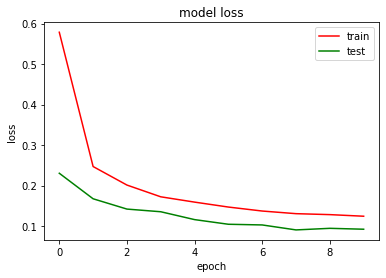

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist_normal.history['loss'], color='red')
ax.plot(hist_normal.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model5.save('model_xavier.h5')
model6.save('model_uniform.h5')
model7.save('model_normal.h5')

### Comparision between above weights initialization

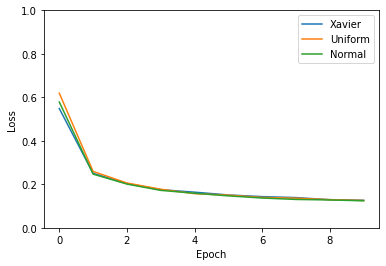

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])

plt.plot(hist_xavier.history['loss'], label='Xavier')
plt.plot(hist_uniform.history['loss'], label='Uniform')
plt.plot(hist_normal.history['loss'], label='Normal') 

plt.legend()

# Running for Various Learning rate

### 1. Training Neural Net with Learning rate = 0.1

In [ ]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(512, kernel_initializer='random_normal'))
model8.add(Activation('relu'))
model8.add(Dropout(0.3))
model8.add(Dense(64, kernel_initializer='random_normal'))
model8.add(Activation('relu'))
model8.add(Dropout(0.2))
model8.add(Dense(10, kernel_initializer='random_normal'))
model8.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
callbacks = [earlystop]

model8.compile(optimizer = Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_01 = model8.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 25s 32ms/step - loss: 3.6676 - accuracy: 0.1012 - val_loss: 2.3103 - val_accuracy: 0.1035
Epoch 2/10
765/765 [==============================] - 24s 32ms/step - loss: 2.3120 - accuracy: 0.1036 - val_loss: 2.3088 - val_accuracy: 0.1109
Epoch 3/10
765/765 [==============================] - 26s 33ms/step - loss: 2.3105 - accuracy: 0.1041 - val_loss: 2.3138 - val_accuracy: 0.1034
Epoch 4/10
765/765 [==============================] - 24s 32ms/step - loss: 2.3091 - accuracy: 0.1040 - val_loss: 2.3095 - val_accuracy: 0.0992
Epoch 5/10
765/765 [==============================] - 24s 32ms/step - loss: 2.3096 - accuracy: 0.1063 - val_loss: 2.3051 - val_accuracy: 0.0995
Epoch 6/10
765/765 [==============================] - 25s 32ms/step - loss: 2.3088 - accuracy: 0.1024 - val_loss: 2.3105 - val_accuracy: 0.1109
Epoch 7/10
765/765 [==============================] - 24s 32ms/step - loss: 2.3098 - accuracy: 0.1036 - val_loss: 2.3140 - val_accuracy:

### 2. Training Neural Net with learning rate = 0.01

In [ ]:
model9 = Sequential()
model9.add(Flatten())
model9.add(Dense(512, kernel_initializer='random_normal'))
model9.add(Activation('relu'))
model9.add(Dropout(0.3))
model9.add(Dense(64, kernel_initializer='random_normal'))
model9.add(Activation('relu'))
model9.add(Dropout(0.2))
model9.add(Dense(10, kernel_initializer='random_normal'))
model9.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
callbacks = [earlystop]

model9.compile(optimizer = Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_001 = model9.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 26s 34ms/step - loss: 0.8068 - accuracy: 0.7381 - val_loss: 0.3475 - val_accuracy: 0.8992
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.4469 - accuracy: 0.8706 - val_loss: 0.2695 - val_accuracy: 0.9219
Epoch 3/10
765/765 [==============================] - 25s 33ms/step - loss: 0.4150 - accuracy: 0.8829 - val_loss: 0.2292 - val_accuracy: 0.9355
Epoch 4/10
765/765 [==============================] - 25s 33ms/step - loss: 0.4062 - accuracy: 0.8881 - val_loss: 0.2407 - val_accuracy: 0.9327
Epoch 5/10
765/765 [==============================] - 25s 32ms/step - loss: 0.3928 - accuracy: 0.8927 - val_loss: 0.2787 - val_accuracy: 0.9220
Epoch 6/10
765/765 [==============================] - 25s 32ms/step - loss: 0.3998 - accuracy: 0.8927 - val_loss: 0.2331 - val_accuracy: 0.9366
Epoch 7/10
765/765 [==============================] - 25s 32ms/step - loss: 0.3705 - accuracy: 0.8986 - val_loss: 0.2335 - val_accuracy:

### 3. Training Neural Net with learning rate = 0.001

In [ ]:
model10 = Sequential()
model10.add(Flatten())
model10.add(Dense(512, kernel_initializer='random_normal'))
model10.add(Activation('relu'))
model10.add(Dropout(0.3))
model10.add(Dense(64, kernel_initializer='random_normal'))
model10.add(Activation('relu'))
model10.add(Dropout(0.2))
model10.add(Dense(10, kernel_initializer='random_normal'))
model10.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
callbacks = [earlystop]

model10.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_0001 = model10.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 27s 34ms/step - loss: 0.9324 - accuracy: 0.7054 - val_loss: 0.2410 - val_accuracy: 0.9274
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2662 - accuracy: 0.9188 - val_loss: 0.1770 - val_accuracy: 0.9438
Epoch 3/10
765/765 [==============================] - 25s 33ms/step - loss: 0.2060 - accuracy: 0.9367 - val_loss: 0.1401 - val_accuracy: 0.9578
Epoch 4/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1826 - accuracy: 0.9429 - val_loss: 0.1193 - val_accuracy: 0.9630
Epoch 5/10
765/765 [==============================] - 26s 33ms/step - loss: 0.1611 - accuracy: 0.9515 - val_loss: 0.1224 - val_accuracy: 0.9637
Epoch 6/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1531 - accuracy: 0.9538 - val_loss: 0.1127 - val_accuracy: 0.9653
Epoch 7/10
765/765 [==============================] - 25s 33ms/step - loss: 0.1426 - accuracy: 0.9560 - val_loss: 0.0984 - val_accuracy:

### 4. Training Neural Net with Exponential Annealing

In [ ]:
model11 = Sequential()
model11.add(Flatten())
model11.add(Dense(512, kernel_initializer='random_normal'))
model11.add(Activation('relu'))
model11.add(Dropout(0.3))
model11.add(Dense(64, kernel_initializer='random_normal'))
model11.add(Activation('relu'))
model11.add(Dropout(0.2))
model11.add(Dense(10, kernel_initializer='random_normal'))
model11.add(Activation('softmax'))

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08)
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)

def exp_decay(epoch):
   initial_lrate = 0.01
   lrate = initial_lrate * math.exp(-0.1*epoch)
   return lrate

lrt = LearningRateScheduler(exp_decay)
callbacks = [earlystop, lrt]

model11.compile(optimizer = Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_annealing = model11.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 26s 34ms/step - loss: 0.7953 - accuracy: 0.7439 - val_loss: 0.3204 - val_accuracy: 0.9067
Epoch 2/10
765/765 [==============================] - 25s 33ms/step - loss: 0.4319 - accuracy: 0.8752 - val_loss: 0.2750 - val_accuracy: 0.9188
Epoch 3/10
765/765 [==============================] - 26s 34ms/step - loss: 0.3858 - accuracy: 0.8931 - val_loss: 0.2184 - val_accuracy: 0.9389
Epoch 4/10
765/765 [==============================] - 26s 34ms/step - loss: 0.3294 - accuracy: 0.9096 - val_loss: 0.1982 - val_accuracy: 0.9411
Epoch 5/10
765/765 [==============================] - 26s 34ms/step - loss: 0.3117 - accuracy: 0.9141 - val_loss: 0.1810 - val_accuracy: 0.9460
Epoch 6/10
765/765 [==============================] - 27s 35ms/step - loss: 0.2714 - accuracy: 0.9237 - val_loss: 0.1714 - val_accuracy: 0.9516
Epoch 7/10
765/765 [==============================] - 27s 35ms/step - loss: 0.2678 - accuracy: 0.9259 - val_loss: 0.1587 - val_accuracy:

In [ ]:
model8.save('model_01.h5')
model9.save('model_001.h5')
model10.save('model_0001.h5')
model11.save('model_annealing.h5')

### Comparision between different Learning rates

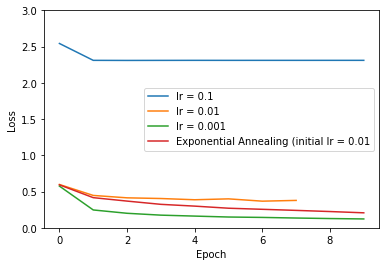

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 3])

plt.plot(hist_01.history['loss'], label='lr = 0.1')
plt.plot(hist_001.history['loss'], label='lr = 0.01')
plt.plot(hist_0001.history['loss'], label='lr = 0.001') 
plt.plot(hist_annealing.history['loss'], label='Exponential Annealing (initial lr = 0.01') 

plt.legend()


---



# PART : 2

### Creating Latent representations of images

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(64, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_autoencoder = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0318 - val_loss: 0.0146
Epoch 2/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 3/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0131 - val_loss: 0.0128
Epoch 4/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 5/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 6/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 7/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 8/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 9/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.011

Epoch vs loss for Autoencoder
-----------------------------



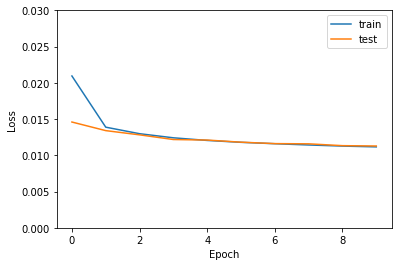

In [ ]:
print("Epoch vs loss for Autoencoder")
print("-----------------------------\n")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.03])
plt.plot(history_autoencoder.history['loss'], label='train')
plt.plot(history_autoencoder.history['val_loss'], label='test')
plt.legend()

Latent representation of image
------------------------------



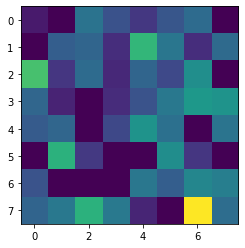

In [ ]:
latent_train = encoder.predict(x_train)
print("Latent representation of image")
print("------------------------------\n")
plt.imshow(latent_train[0].reshape((8,8)))

In [ ]:
latent_test = encoder.predict(x_test)

In [ ]:
def format_shape(latent):
    x = []
    for img in latent:
        img = img.reshape(8,8)
        x.append(img)
    return x

In [ ]:
xtrain = np.array(format_shape(latent_train))
xtest = np.array(format_shape(latent_test))

latent_train = xtrain.reshape(49000,8,8,1)
latent_test = xtest.reshape(21000,8,8,1)

print(latent_train.shape)
print(latent_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 8, 8, 1)
(21000, 8, 8, 1)
(49000, 10)
(21000, 10)


### Training Classifier over Latent representation

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
training_set= train_gen.flow(latent_train, y_train, batch_size=64)
test_set= train_gen.flow(latent_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_latent = model.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 4s 5ms/step - loss: 0.9242 - accuracy: 0.6994 - val_loss: 0.2872 - val_accuracy: 0.9113
Epoch 2/10
765/765 [==============================] - 4s 5ms/step - loss: 0.3100 - accuracy: 0.9052 - val_loss: 0.1968 - val_accuracy: 0.9393
Epoch 3/10
765/765 [==============================] - 4s 5ms/step - loss: 0.2302 - accuracy: 0.9301 - val_loss: 0.1642 - val_accuracy: 0.9480
Epoch 4/10
765/765 [==============================] - 4s 5ms/step - loss: 0.1909 - accuracy: 0.9420 - val_loss: 0.1403 - val_accuracy: 0.9565
Epoch 5/10
765/765 [==============================] - 4s 5ms/step - loss: 0.1715 - accuracy: 0.9456 - val_loss: 0.1307 - val_accuracy: 0.9602
Epoch 6/10
765/765 [==============================] - 4s 5ms/step - loss: 0.1553 - accuracy: 0.9516 - val_loss: 0.1128 - val_accuracy: 0.9647
Epoch 7/10
765/765 [==============================] - 4s 5ms/step - loss: 0.1339 - accuracy: 0.9589 - val_loss: 0.1145 - val_accuracy: 0.9640
Epoch 

### Training Classifer over original images

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)
# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist_original = model.fit_generator(training_set, steps_per_epoch=49000//64, validation_data= test_set, callbacks = callbacks, validation_steps=21000//64, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
765/765 [==============================] - 7s 9ms/step - loss: 0.5449 - accuracy: 0.8294 - val_loss: 0.1442 - val_accuracy: 0.9565
Epoch 2/10
765/765 [==============================] - 7s 9ms/step - loss: 0.1457 - accuracy: 0.9566 - val_loss: 0.1102 - val_accuracy: 0.9655
Epoch 3/10
765/765 [==============================] - 7s 9ms/step - loss: 0.1055 - accuracy: 0.9679 - val_loss: 0.0924 - val_accuracy: 0.9716
Epoch 4/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0810 - accuracy: 0.9738 - val_loss: 0.0849 - val_accuracy: 0.9745
Epoch 5/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0886 - val_accuracy: 0.9734
Epoch 6/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0591 - accuracy: 0.9827 - val_loss: 0.0880 - val_accuracy: 0.9746
Epoch 7/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 

#### Accuracy for Original Data :  97.71%
#### Accuracy for Latent Data : 96.79%

### Epoch v/s Loss graph for Latent images and Original images 

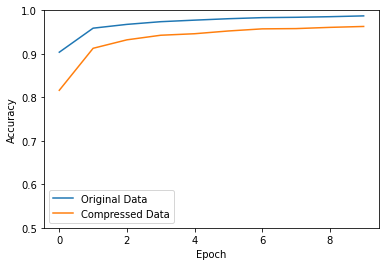

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

plt.plot(hist_original.history['accuracy'], label='Original Data')
plt.plot(hist_latent.history['accuracy'], label='Compressed Data')

plt.legend()

#### INFERENCE : Accuracy of both original images and latent representations comes out to be similar to 97%. But Latent representation of data took very less training time as compared to original images (due to less dimensionality), hence it is better to when we need to train millions of images. 